In [18]:
import torch
from torch.autograd import Variable
x=Variable(torch.ones(2,2),requires_grad=True)

In [19]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [20]:
y=x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [21]:
y.grad_fn

In [22]:
z=y*y

In [23]:
z.grad_fn

In [24]:
t=torch.mean(z)

In [25]:
t.backward()

In [26]:
print(x.grad)

tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


In [27]:
x=Variable(torch.linspace(0,100).type(torch.FloatTensor))

In [28]:
rand=Variable(torch.randn(100))*10

In [29]:
y=x+rand

In [30]:
x_train=x[:-10]
x_test=x[-10:]
y_train=y[:-10]
y_test=y[-10:]

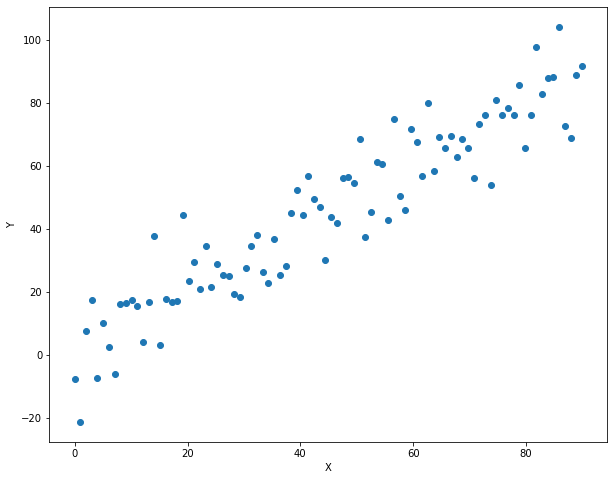

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [32]:
a=Variable(torch.rand(1),requires_grad=True)
b=Variable(torch.rand(1),requires_grad=True)

In [33]:
learning_rate=0.0001

In [34]:
for i in range(1000):
    predictions = a.expand_as(x_train)*x_train + b.expand_as(x_train)
    loss = torch.mean((predictions-y_train)**2)
    print('loss:',loss)
    loss.backward()
    a.data.add_(-learning_rate*a.grad.data)
    b.data.add_(-learning_rate*b.grad.data)
    a.grad.data.zero_()
    b.grad.data.zero_()

grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<MeanBackward1>)
loss: tensor(95.8524, grad_fn=<MeanBackward1>)
loss: tensor(95.8525, grad_fn=<Mean

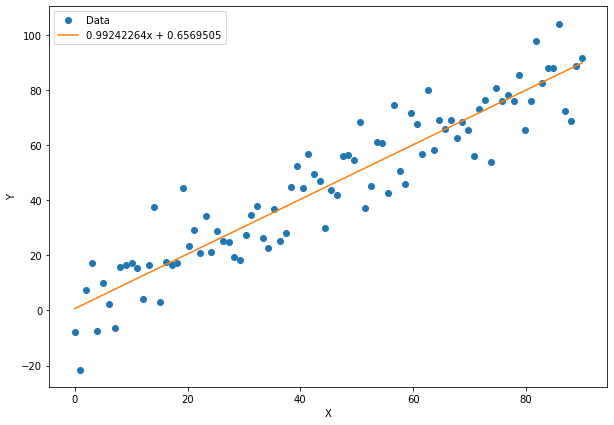

In [36]:
    x_data=x_train.data.numpy()
    plt.figure(figsize=(10,7))
    xplot,=plt.plot(x_data,y_train.data.numpy(),'o')
    yplot,=plt.plot(x_data,a.data.numpy()*x_data+b.data.numpy())
    plt.xlabel('X')
    plt.ylabel('Y')
    str1 = str(a.data.numpy()[0])+'x + ' + str(b.data.numpy()[0])
    plt.legend([xplot,yplot],['Data',str1])
    plt.show()